# Data Analysis

Planning for data analysis
<ul type='square'>
    <li>Preparing/collecting the data</li>
    <li>Undertanding data</li>
    <li>Exploring data insights</li>
    <li>Data Cleansing</li>
    <li>Feature selection</li>
    <li>Creating model</li>
    <li>Fit data to the model</li>
    <li>Evaluate the model</li>
    <li>Fine tune the model</li></ul>

In [1]:
## required packages
import pandas as pd
import os
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
DATA_DIR='data/'

In [2]:
# Load Excel dataset for analysis. I will use pandas library to work with it.
def load_data(file_name,sheet):
    return pd.read_excel(os.path.join(DATA_DIR,file_name), sheet, index_col=None)

In [3]:
control_data=load_data('UdacityABtesting.xlsx','Control')
print(control_data.shape)
experment_data=load_data('UdacityABtesting.xlsx','Experiment')
print(experment_data.shape)

(37, 5)
(37, 5)


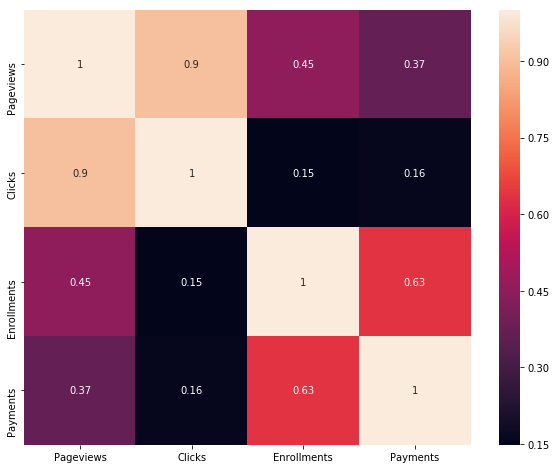

In [4]:
corr = control_data.corr()
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr,annot=True,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

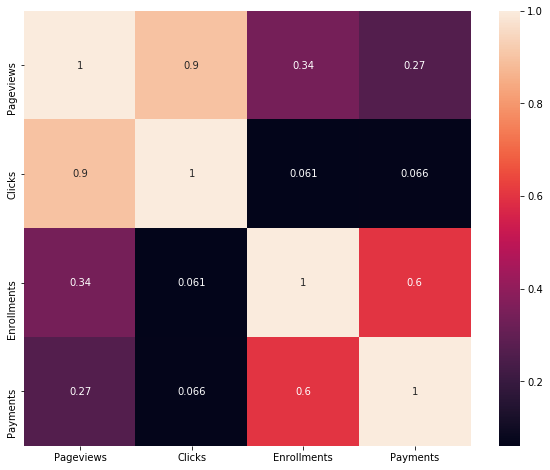

In [5]:
corr = experment_data.corr()
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr,annot=True,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

For both Control and Experment data, Payment feature is highly correlated (63% Control, 60% Experiment) to the target feature Enrollment. This shows that payment is very critical for enrollment prediction.

# Data analysis tasks

In [6]:
##investigating the data
experment_data.head()

,Date,Pageviews,Clicks,Enrollments,Payments
0,"Sat, Oct 11",7716,686,105.0,34.0
1,"Sun, Oct 12",9288,785,116.0,91.0
2,"Mon, Oct 13",10480,884,145.0,79.0
3,"Tue, Oct 14",9867,827,138.0,92.0
4,"Wed, Oct 15",9793,832,140.0,94.0


In [7]:
control_data.head()

,Date,Pageviews,Clicks,Enrollments,Payments
0,"Sat, Oct 11",7723,687,134.0,70.0
1,"Sun, Oct 12",9102,779,147.0,70.0
2,"Mon, Oct 13",10511,909,167.0,95.0
3,"Tue, Oct 14",9871,836,156.0,105.0
4,"Wed, Oct 15",10014,837,163.0,64.0


In [8]:
control_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 5 columns):
Date           37 non-null object
Pageviews      37 non-null int64
Clicks         37 non-null int64
Enrollments    23 non-null float64
Payments       23 non-null float64
dtypes: float64(2), int64(2), object(1)
memory usage: 1.5+ KB


In [9]:
experment_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 5 columns):
Date           37 non-null object
Pageviews      37 non-null int64
Clicks         37 non-null int64
Enrollments    23 non-null float64
Payments       23 non-null float64
dtypes: float64(2), int64(2), object(1)
memory usage: 1.5+ KB


Both experment and control has total of 5 columns and 37 enteries. Interms of feature distribution both experment and control data has 4 continous and 1 categorical(i.e date column) feature. Moreover, Enrollments and Payments column has only 23 non-null features values out of 37. So, we need to invetigate on this later.

Lets inspect which rows data is missed.

In [10]:
experment_data.loc[experment_data['Enrollments'].isnull()]

,Date,Pageviews,Clicks,Enrollments,Payments
23,"Mon, Nov 3",9359,789,NaN,NaN
24,"Tue, Nov 4",9427,743,NaN,NaN
25,"Wed, Nov 5",9633,808,NaN,NaN
26,"Thu, Nov 6",9842,831,NaN,NaN
27,"Fri, Nov 7",9272,767,NaN,NaN
28,"Sat, Nov 8",8969,760,NaN,NaN
29,"Sun, Nov 9",9697,850,NaN,NaN
30,"Mon, Nov 10",10445,851,NaN,NaN
31,"Tue, Nov 11",9931,831,NaN,NaN
32,"Wed, Nov 12",10042,802,NaN,NaN


In [11]:
control_data.loc[control_data['Enrollments'].isnull()]

,Date,Pageviews,Clicks,Enrollments,Payments
23,"Mon, Nov 3",9437,788,NaN,NaN
24,"Tue, Nov 4",9420,781,NaN,NaN
25,"Wed, Nov 5",9570,805,NaN,NaN
26,"Thu, Nov 6",9921,830,NaN,NaN
27,"Fri, Nov 7",9424,781,NaN,NaN
28,"Sat, Nov 8",9010,756,NaN,NaN
29,"Sun, Nov 9",9656,825,NaN,NaN
30,"Mon, Nov 10",10419,874,NaN,NaN
31,"Tue, Nov 11",9880,830,NaN,NaN
32,"Wed, Nov 12",10134,801,NaN,NaN


For both control and experment data, target column Enrollments is missed for entries after November 3. So, thee only option we have is droping all with null values.

In [12]:
##Merging two DataFrames
data = control_data.append(experment_data, ignore_index=True)
data.shape

(74, 5)

In [13]:
dummy=[0] * 74
data.insert(1, 'id',dummy)
data.loc[data.Enrollments.isin(experment_data.Enrollments), 'id'] = 1
data.tail(10)##because appended rows are at last position

,Date,id,Pageviews,Clicks,Enrollments,Payments
64,"Fri, Nov 7",1,9272,767,NaN,NaN
65,"Sat, Nov 8",1,8969,760,NaN,NaN
66,"Sun, Nov 9",1,9697,850,NaN,NaN
67,"Mon, Nov 10",1,10445,851,NaN,NaN
68,"Tue, Nov 11",1,9931,831,NaN,NaN
69,"Wed, Nov 12",1,10042,802,NaN,NaN
70,"Thu, Nov 13",1,9721,829,NaN,NaN
71,"Fri, Nov 14",1,9304,770,NaN,NaN
72,"Sat, Nov 15",1,8668,724,NaN,NaN
73,"Sun, Nov 16",1,8988,710,NaN,NaN


In [14]:
# # convert the 'Date' column to datetime format and append new column that holds weekday
data['Date'] = pd.to_datetime(data['Date'],format='%a, %b %d', errors='ignore') 
data.insert(2,'day_of_week',data['Date'].dt.weekday)
##shuffle rows using sklearn utils package to control data leakage
import sklearn
data = sklearn.utils.shuffle(data)

##add column named row_id to hold index of entries
data.insert(0,'row_id',range(1, len(data) + 1))
data.set_index('row_id')

,Date,id,day_of_week,Pageviews,Clicks,Enrollments,Payments
row_id,,,,,,,
1,1900-11-08,1,3,9010,756,NaN,NaN
2,1900-10-21,0,6,10660,867,196.0,105.0
3,1900-11-15,1,3,8668,724,NaN,NaN
4,1900-10-14,1,6,9867,827,138.0,92.0
5,1900-10-17,0,2,9008,748,146.0,76.0
6,1900-10-22,1,0,9947,838,162.0,92.0
7,1900-11-13,1,1,9717,814,NaN,NaN
8,1900-11-06,1,1,9921,830,NaN,NaN
9,1900-10-12,0,4,9102,779,147.0,70.0


In [15]:
data.head()

,row_id,Date,id,day_of_week,Pageviews,Clicks,Enrollments,Payments
28,1,1900-11-08,1,3,9010,756,NaN,NaN
10,2,1900-10-21,0,6,10660,867,196.0,105.0
72,3,1900-11-15,1,3,8668,724,NaN,NaN
40,4,1900-10-14,1,6,9867,827,138.0,92.0
6,5,1900-10-17,0,2,9008,748,146.0,76.0


As we can see from the result, interestingly all operations are successfull. day_of_week column indicateds 0 to 6 fro Monday to Sunday and id is for experment checking and row_id is used reference column.

In [16]:
#drop Date and Payments Coloumns
drop_coloumn_list = ['Date','Payments']
data=data.drop(drop_coloumn_list, axis=1)
data.shape

(74, 6)

In [17]:
##Handle the missing data (NA) by removing these rows
data = data.dropna(how='any',axis=0) #It will delete every row (axis=0) that has "any" Null value in it.
data.shape

(46, 6)

As we can see 28 rows are deleted because of missed values.

In [18]:
data.head(10)

,row_id,id,day_of_week,Pageviews,Clicks,Enrollments
10,2,0,6,10660,867,196.0
40,4,1,6,9867,827,138.0
6,5,0,2,9008,748,146.0
11,6,1,0,9947,838,162.0
1,9,0,4,9102,779,147.0
49,11,1,1,8176,642,122.0
5,13,1,1,9670,823,138.0
55,16,1,0,9262,727,201.0
56,18,1,1,9308,728,207.0
19,23,0,1,9345,734,167.0


# Training Model

Three algorithms are compared. <ul><li>Random Forest</li><li>Decision Tree</li><li>XGBoost</li></ul>

In [57]:
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import auc, accuracy_score, confusion_matrix, mean_squared_error
from sklearn.model_selection import cross_val_score, GridSearchCV,StratifiedKFold, KFold, RandomizedSearchCV, train_test_split
def display_scores(scores):
    print("Scores: {0}\nMean: {1:.3f}\nStd: {2:.3f}".format(scores, np.mean(scores), np.std(scores)))
    
def train_RandomForest(X_train, y_train):
    scores = []
    # Use the random grid to search for best hyperparameters
    # Number of trees in random forest
    n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
    # Number of features to consider at every split
    max_features = ['auto', 'sqrt']
    # Maximum number of levels in tree
    max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
    max_depth.append(None)
    # Minimum number of samples required to split a node
    min_samples_split = [2, 5, 10]
    # Minimum number of samples required at each leaf node
    min_samples_leaf = [1, 2, 4]
    # Method of selecting samples for training each tree
    bootstrap = [True, False]
    # Create the random grid
    random_grid = {'n_estimators': n_estimators,
                   'max_features': max_features,
                   'max_depth': max_depth,
                   'min_samples_split': min_samples_split,
                   'min_samples_leaf': min_samples_leaf,
                   'bootstrap': bootstrap}
    # First create the base model to tune
    rf = RandomForestRegressor()
    # Random search of parameters, using 5 fold cross validation, 
    # search across 100 different combinations, and use all available cores
    rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 5,
                                   verbose=1, random_state=42, n_jobs = -1)
    # Fit the random search model
    rf_random.fit(X_train, y_train)
    predictions=rf_random.predict(y_train)
    
    print("MSE:{0:.3f}\RMSE: {1:.3f}".format(mean_squared_error(y_test, predictions),
                                                            np.sqrt(mean_squared_error(y_train, predictions))))

def train_DT(X_train, y_train,x_test,y_test):
    dtr= DecisionTreeRegressor()
    dtr.fit(x_train,y_train)
    y_pred = dtr.predict(x_test)
    print(mean_squared_error(y_test, y_pred))
    


def train_XGB(X_train,X_test,y_train, y_test):
    data_dmatrix = xgb.DMatrix(data=X_train,label=y_train)
    params = {"objective":"reg:linear",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 5, 'alpha': 10}
    cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=5,
                    num_boost_round=100,early_stopping_rounds=10,metrics="rmse", as_pandas=True, seed=123)
    print(cv_results.head())
    print((cv_results["test-rmse-mean"]).tail(1))
    xg_reg = xgb.train(params=params, dtrain=data_dmatrix, num_boost_round=10)
    xgb.plot_importance(xg_reg)
    plt.rcParams['figure.figsize'] = [5, 5]
    plt.show()


In [49]:
y=data.Enrollments.values
X=data.drop(['row_id','Enrollments'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.1, random_state=42)

   train-rmse-mean  train-rmse-std  test-rmse-mean  test-rmse-std
0       143.495904        1.871520      143.279126       8.566915
1       130.381508        1.717758      130.058894       8.708339
2       118.602792        1.583638      118.318460       8.869647
3       108.052387        1.467057      107.744661       9.012557
4        98.600679        1.365147       98.665820       9.160198
72    28.488258
Name: test-rmse-mean, dtype: float64


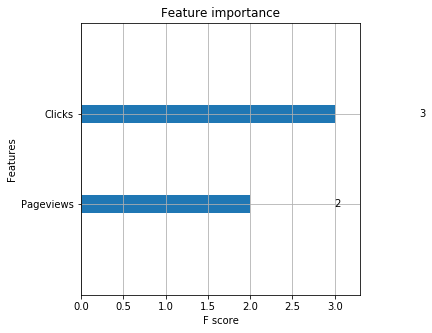

In [50]:
train_XGB(X_train,X_test,y_train, y_test)

The information gain is 50% from Pageviews and Clicks combined. Experiment has no significan contribution to information gain, indicating it’s still predictive (just not nearly as much as Pageviews). This tells a story that if Enrollments are critical, Udacity should focus on getting clicks and Pageviews.

In [58]:
train_DT(X_train,y_trian,X_test,y_test)

NameError: name 'y_trian' is not defined

To generalize the result even if further investigation is required for other models also, If Udacity wants to maximimize enrollments, it should focus on getting clicks. Click is the most important feature in our model.

In [ ]:
# train_RandomForest(X,y)